2.IMPORT PUSTAKA DAN MODUL


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
import json
import nltk
import time
import random
import string
import pickle
import IPython.display as ipd
from gtts import gTTS
from nltk.stem import WordNetLemmatizer


3.UNDUH SUMBER DAYA NTLK


In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

4.MUAT DAN PROSES DATA JSON

In [5]:
import json
import pandas as pd
import nltk
import string

# Pastikan pustaka NLTK diunduh
nltk.download('punkt')
nltk.download('wordnet')

# Tentukan jalur file JSON lokal
json_file_path = 'intents.json'  # Ganti dengan jalur yang sesuai jika diperlukan

# Muat data JSON
try:
    with open(json_file_path, 'r') as file:
        data1 = json.load(file)
except FileNotFoundError:
    print(f"File not found: {json_file_path}")
    raise
except json.JSONDecodeError:
    print("Error decoding JSON")
    raise

# Inisialisasi variabel
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']

# Proses data JSON
for intent in data1.get('intents', []):
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])
        w = nltk.word_tokenize(lines)
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Buat DataFrame dari data
data = pd.DataFrame({"patterns": inputs, "tags": tags})

# Print beberapa informasi untuk verifikasi
print("Dataframe created successfully")
print(data.head())
print(f"Total unique words: {len(set(words))}")
print(f"Total classes: {len(classes)}")
print(f"Total documents: {len(documents)}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataframe created successfully
  patterns      tags
0    hallo  greeting
1      hai  greeting
2     halo  greeting
3      hei  greeting
4       hi  greeting
Total unique words: 81
Total classes: 36
Total documents: 76


5.PREPROCESSING DATA

In [6]:
# Tampilkan beberapa baris dari DataFrame
data.head()
data.tail()

# Membersihkan dan memproses teks
data['patterns'] = data['patterns'].apply(lambda wrd: [ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

# Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print(len(words), "unique lemmatized words", words)
classes = sorted(list(set(classes)))
print(len(classes), "classes", classes)
print(len(documents), "documents")


76 unique lemmatized words ['(', ')', 'abs', 'afternoon', 'apa', 'aplikasi', 'atau', 'bagaimana', 'bai', 'banyak', 'berlubang', 'bro', 'bye', 'byee', 'cara', 'dadah', 'dah', 'dan', 'dentalcare', 'dentalcarebot', 'digital', 'edukasi', 'frenitis', 'gigi', 'gingvitis', 'good', 'gusi', 'hai', 'hallo', 'halo', 'hei', 'hi', 'hy', 'itu', 'jumpa', 'karies', 'kasih', 'kawan', 'kering', 'kesehatan', 'layanan', 'lesi', 'makasih', 'malam', 'manfaat', 'mencegah', 'merawat', 'morning', 'mulut', 'pagi', 'patah', 'penyakit', 'penyuluhan', 'periodontitis', 'plak', 'program', 'retak', 'saja', 'sampai', 'see', 'selamat', 'sensitivitas', 'si', 'siang', 'siapa', 'sore', 'tartar', 'teknologi', 'terima', 'thank', 'thanks', 'tinggal', 'tujuan', 'ulkus', 'xerostomia', 'you']
36 classes ['Dentalcarebot', 'Mau tahu Tentang penyakit gigi dan cara mencegahnya', 'Mencegah_Abses Gigi', 'Mencegah_Frenitis', 'Mencegah_Gigi Retak atau Patah', 'Mencegah_Gingvitis', 'Mencegah_Karies Gigi', 'Mencegah_Lesi dan Ulkus Mulut'

6.TOKENISASI DAN ENCODING

In [8]:
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
x_train = pad_sequences(train)
print(x_train)

# Encoding tag
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

input_shape = x_train.shape[1]
print(input_shape)

vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

output_length = le.classes_.shape[0]
print("output length: ", output_length)


[[ 0  0  0  0  0  0 39]
 [ 0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0 49]
 [ 0  0  0  0  0  0 50]
 [ 0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0 52]
 [ 0  0  0  0  0  0 53]
 [ 0  0  0  0  1  3 33]
 [ 0  0  0  0  0 54 33]
 [ 0  0  0  0  0  0 55]
 [ 0  0  0  0  0  0 56]
 [ 0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0 57]
 [ 0  0  0  0  0 58 34]
 [ 0  0  0  0  0 59 60]
 [ 0  0  0  0  0 61 62]
 [ 0  0  0  0  0  0 63]
 [ 0  0  0  0  0 64 35]
 [ 0  0  0  0  0  0 65]
 [ 0  0  0  0  0 66 35]
 [ 0  0  0  0  0 36 37]
 [ 0  0  0  0  0  0 67]
 [ 0  0  0  0 36 37 68]
 [ 0  0  0  0  1  3  8]
 [ 0  0  0  0  1 69  8]
 [ 0  0  0  1 11 12  8]
 [ 0  0 12  8 13  4 14]
 [ 0  0 12  8 15 16  2]
 [ 0 12  8 17  4 70 71]
 [ 0  0  0  0 13  4 14]
 [ 0  0  0  0 15 16  2]
 [ 0  0  0  0  0 17  8]
 [ 0  0  1  3 13  4 14]
 [ 0  1 11 18 13

MENYIMPAN OBJEK PENTING

In [9]:
# Menyimpan objek Python menggunakan pickle
import os

# Construct the full file path
file_path = '/content/drive/MyDrive/TA/Natural Language Processing/Chatbot/Model/words.pkl'

# Create the directory if it doesn't exist
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save files
pickle.dump(words, open(file_path, 'wb'))
pickle.dump(classes, open('/content/drive/MyDrive/TA/Natural Language Processing/Chatbot/Model/classes.pkl', 'wb'))
pickle.dump(le, open('/content/drive/MyDrive/TA/Natural Language Processing/Chatbot/Model/le.pkl', 'wb'))
pickle.dump(tokenizer, open('/content/drive/MyDrive/TA/Natural Language Processing/Chatbot/Model/tokenizer.pkl', 'wb'))


8.DEFINISI DAN KOMPILASI MODEL


In [ ]:
# Mendefinisikan dan mengkompilasi model neural network
i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Menyimpan representasi visual model
plot_model(model, to_file='/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/model_plot.png', show_shapes=True, show_layer_names=True)

# Menampilkan ringkasan model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 7, 10)               │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 10)               │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 36)                  │           2,556 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,146 (16.20 KB)

 Trainable params: 4,146 (16.20 KB)

 Non-trainable params: 0 (0.00 B)

9.PELATIHAN MODEL

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0282 
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0281 
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0287 
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0281 
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0285
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0302 
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0281 
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0272
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0270 
Epoch 10/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0282
Epoch 11/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0267 
Epoch 12/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0

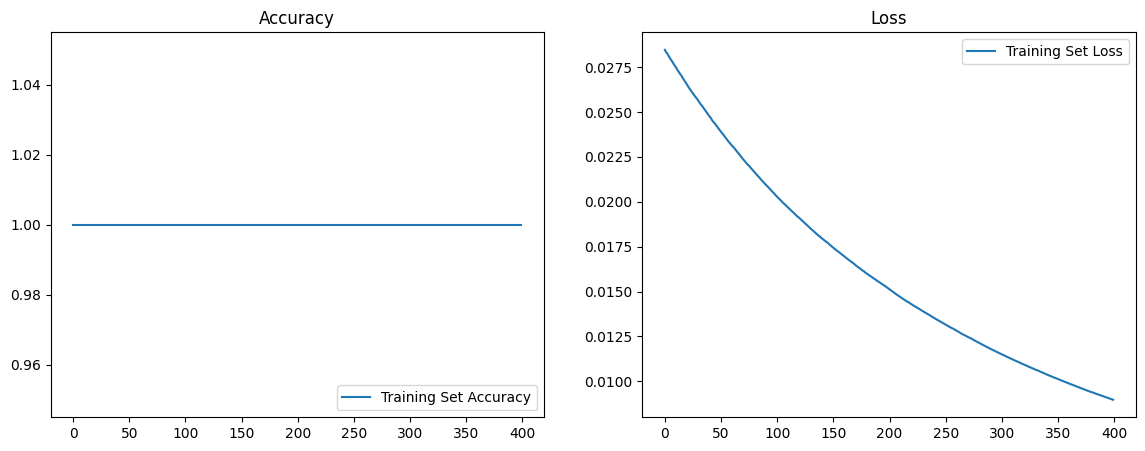

In [ ]:
# Proses pelatihan model
history = model.fit(x_train, y_train, epochs=400)  # Assign the result to 'history'

# Memvisualisasikan metrik pelatihan
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

10.IMPLEMENTASI MODEL

In [ ]:
while True:
    texts_p = []
    prediction_input = input('🤵 kamu : ')

    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    output = model.predict(prediction_input)
    output = output.argmax()

    response_tag = le.inverse_transform([output])[0]
    response = random.choice(responses[response_tag])
    print("🤖 Dentalcarebot : ", response)

    # Menghasilkan suara dari respons
    tts = gTTS(response, lang='id')
    tts.save('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/Dentalcarebot.wav')
    time.sleep(0.08)

    ipd.display(ipd.Audio('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/Dentalcarebot.wav', autoplay=False))
    print("="*60 + "\n")

    if response_tag == "goodbye":
        break
